## Credit_card_fraud_detection_using_neural_network

In [1]:
import numpy as np 
import pandas as pd
from math import sqrt

In [2]:
import sklearn.utils
from sklearn.preprocessing import RobustScaler #Scaling the features
from sklearn.model_selection import StratifiedShuffleSplit #Splitting the dataset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, auc
from sklearn.model_selection import GridSearchCV #hyperparameter tuning
from sklearn.decomposition import PCA

In [3]:
!pip install packaging
from packaging.version import parse as parse_version
from packaging.version import parse as parse_version
!pip install --upgrade scikit-learn
!pip install --upgrade imbalanced-learn
import sklearn
import imblearn

print(sklearn.__version__)
print(imblearn.__version__)


1.5.1
0.12.3


In [4]:
#Visual Analysis
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import IPython

from imblearn.over_sampling import ADASYN #Adaptive Synthetic Oversampling
from collections import Counter
from scipy import stats

In [5]:
!pip install keras

In [6]:
!pip install tensorflow

In [7]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
from tensorflow.keras.constraints import MaxNorm
print("MaxNorm constraint imported successfully")


TensorFlow version: 2.16.2
MaxNorm constraint imported successfully


In [8]:
pip install scikeras

Note: you may need to restart the kernel to use updated packages.


In [9]:
# Neural Network Implementations
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
import warnings 
warnings.filterwarnings('ignore')
print('Imported successfully')


Imported successfully


## Dataset Analysis And Preprocessing

In [11]:
#Loading data in a dataframe 'creditcard_data' and using head() to display the first 5 instances.
creditcard_data = pd.read_csv(r'creditcard.csv.zip')
creditcard_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
creditcard_data.head(n=20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [14]:
creditcard_data.shape

(284807, 31)

In [15]:
creditcard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [16]:
creditcard_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

the sum 0 for all attributes indicate that there are no missing values

In [18]:
creditcard_data['Class'].nunique()

2

In [19]:
creditcard_data.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

This shows a complete imbalance of classes. There are 284315 'Genuine' (0) instances and only 492 'Fraudulent' (1) instances.

<Axes: xlabel='Class'>

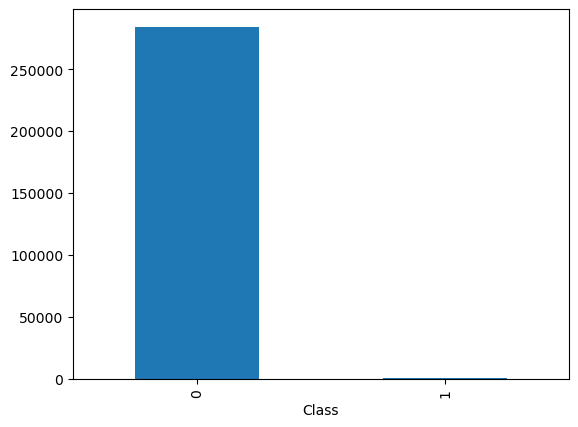

In [21]:
#visual representation of instance per class
creditcard_data.Class.value_counts().plot.bar()

This gives a visual representation of the class imbalance. The below plot after PCA gives a better visualization of the imbalnce in the datasets.

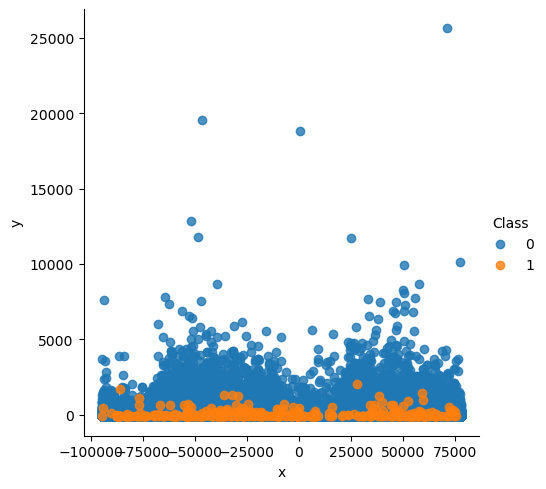

In [23]:
#Before smapling PCA is performed for visualization only
pca = PCA(n_components=2)
creditcard_2d= pd.DataFrame(pca.fit_transform(creditcard_data.iloc[:,0:30]))
creditcard_2d= pd.concat([creditcard_2d, creditcard_data['Class']],axis=1)
creditcard_2d.columns = ['x','y','Class']
sns.lmplot(x='x',y='y', data= creditcard_2d, fit_reg=False, hue='Class')

In [24]:
#Descriptive Statistics
creditcard_data.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [25]:
#checking the percentage of each class in the dataset
(creditcard_data.Class.value_counts())/(creditcard_data.Class.count())

Class
0    0.998273
1    0.001727
Name: count, dtype: float64

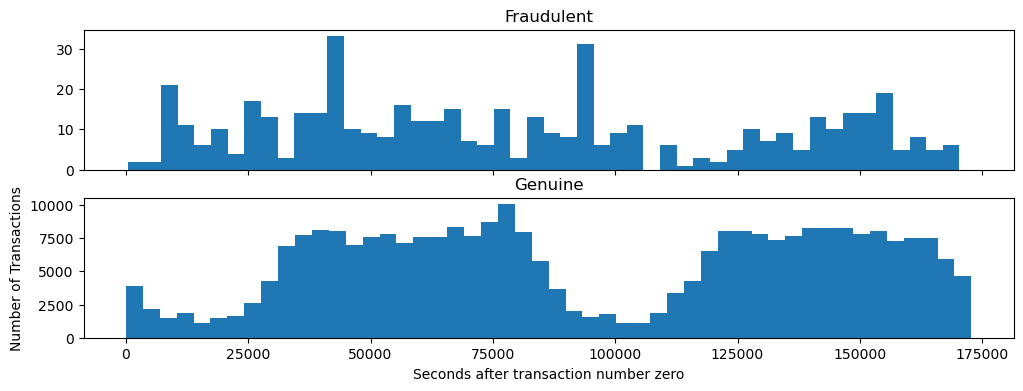

In [26]:
#Histrogram for feature time
f, (ax1, ax2) = plt.subplots(2,1,sharex= True, figsize=(12,4))
ax1.hist(creditcard_data["Time"][creditcard_data["Class"] == 1], bins = 50)
ax1.set_title('Fraudulent')
ax2.hist(creditcard_data["Time"][creditcard_data["Class"] == 0], bins = 50)
ax2.set_title('Genuine')
plt.xlabel('Seconds after transaction number zero')
plt.ylabel('Number of Transactions')
plt.show()


The transactions occur in a cyclic way. But the time feature does not provide any useful information 
as the time when the first transaction was initiated is not given.Thus we'll drop this feature

In [28]:
#dropping time because it doesnot give any valuable information
creditcard_data = creditcard_data.drop("Time", axis = 1)
creditcard_data.shape

(284807, 30)

Now there are 30 features in the dataset

In [31]:
#Descriptive statistics for Fraudulent Transaction
print("Fraudulent Transactions")
creditcard_data['Amount'][creditcard_data['Class']==1].describe()

Fraudulent Transactions


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [32]:
#Descriptive statistics for Genuine Transaction
print("Genuine Transactions")
creditcard_data['Amount'][creditcard_data['Class']==0].describe()

Genuine Transactions


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Nothing much can be determined from the Amount, as most of the transactions are around 100 in both cases

In [34]:
#Varience
creditcard_data.var()

V1            3.836489
V2            2.726820
V3            2.299029
V4            2.004684
V5            1.905081
V6            1.774946
V7            1.530401
V8            1.426479
V9            1.206992
V10           1.185594
V11           1.041855
V12           0.998403
V13           0.990571
V14           0.918906
V15           0.837803
V16           0.767819
V17           0.721373
V18           0.702539
V19           0.662662
V20           0.594325
V21           0.539526
V22           0.526643
V23           0.389951
V24           0.366808
V25           0.271731
V26           0.232543
V27           0.162919
V28           0.108955
Amount    62560.069046
Class         0.001725
dtype: float64

Amount needs to be scaled.As if a feature has a varience orders of magnitude larger than the rest of the features,then it might dominate and,make the estimator unable to learn from other features as expected

<Axes: xlabel='Class', ylabel='Amount'>

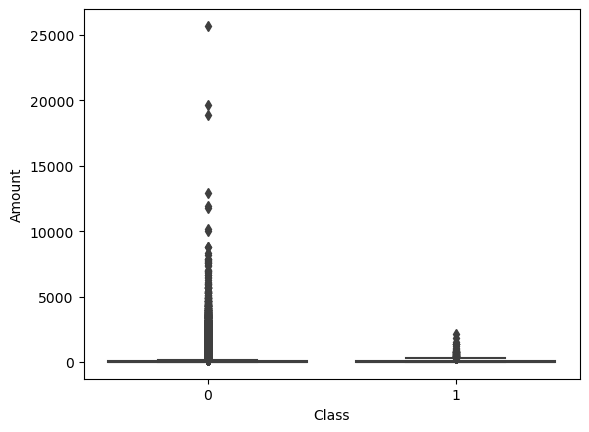

In [36]:
#Boxplot for the Amount feature, inorder to visualise the out liers 
sns.boxplot(x=creditcard_data['Class'], y= creditcard_data['Amount'])

The non-fraudulent transactions are highly skewed.The outliers can be seen visually and thus,its better to use a Robust scaler(it scales the data using the median and the interquartile range (IQR).) to scale the feature amount as it is less prone to outliers 
As other scalers are sensitive to outliers

Median Centering: It centers the data by subtracting the median of each feature.
Scaling by IQR: It scales the data by dividing by the interquartile range (IQR), which is the range between the 25th percentile (Q1) and the 75th percentile (Q3).
The formula for the Robust Scaler is:

(𝑋)scaled = X−Median(X)/IQR(X)


In [38]:
#Standardizing the Amount column (All other 'V' columns are already scaled as they've undergone PCA transformation).
Rob_scaler = RobustScaler()
creditcard_data['Std_Amount'] = Rob_scaler.fit_transform(creditcard_data['Amount'].values.reshape(-1, 1))
creditcard_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Std_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.670579


In [39]:
creditcard_data = creditcard_data.drop('Amount', axis=1)

Std_Amount = creditcard_data['Std_Amount']
creditcard_data.drop('Std_Amount' , axis=1,inplace=True)
creditcard_data.insert(0,'Std_Amount', Std_Amount)
creditcard_data.head()

,Std_Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [40]:
#Splitting the data before Sampling
#Splitting data into train and test set in 80% and 20% respectively, using Stratified Shuffle Split
X = creditcard_data.drop('Class', axis=1)
Y = creditcard_data['Class']
ss1 = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
for train_index1, test_index in ss1.split(X,Y):
    print("Train:" , train_index1, "Test:", test_index)
    Xtrain, Xtest = X.iloc[train_index1] , X.iloc[test_index]
    Ytrain, Ytest = Y.iloc[train_index1] , Y.iloc[test_index]
#Splitting the train set further into train and validation set, which leaves train set 60% of the originial dataset and, test and validation sets 20% each respectively.
ss2 = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=42)
for train_index2, val_index in ss2.split(Xtrain,Ytrain):
    print("Train:", train_index2, "Validation:", val_index)
    Xtrain_final, Xval = X.iloc[train_index2] , X.iloc[val_index]
    Ytrain_final, Yval = Y.iloc[train_index2] , Y.iloc[val_index]

Train: [265518 180305  42664 ...  29062  13766  17677] Test: [263020  11378 147283 ... 274532 269819  64170]
Train: [ 72227 114282  16818 ... 264471 191914 284017] Test: [202638  32978 128121 ... 244024 127667  48318]
Train: [ 20895 114622 167683 ... 244502 178972 218506] Test: [284352  82483  90981 ... 171224 168807 271602]
Train: [122248 181660 194400 ... 104631 277586  29432] Test: [225673  63348  68025 ... 279451  77554  76043]
Train: [241684 223467 136928 ...  86495 160550  49633] Test: [157557 204860  83760 ... 251478 178967 216850]
Train: [186996 144807  69756 ... 195673 152135 100500] Validation: [214502 127768  18878 ...  45194 143895 114668]
Train: [203609 160516 170008 ... 168236  40608 156569] Validation: [152253  33885 217198 ... 219379 125093 195120]
Train: [166473 135845 190847 ... 114436 217810 119523] Validation: [135986 136793 153361 ... 221564 222657 122137]
Train: [ 16294 187750  97608 ... 157188 191303 201639] Validation: [125168  42557 218854 ... 117014  95701  40

Datasets created after spltting are:

1.Train Dataset: Xtrain_final, Ytrain_final
2.Test Dataset: Xtest, Ytest
3.Validation Dataset: Xval, Yval

In [42]:
#Check if the labels are distributed equally in all the datasets after splitting
train_unique_label,train_counts_label = np.unique(Ytrain_final, return_counts=True)
test_unique_label,test_counts_label = np.unique(Ytest, return_counts=True)
val_unique_label,val_counts_label = np.unique(Yval, return_counts=True)

print('Label Distribution: \n')
print(train_counts_label/len(Ytrain_final))
print(test_counts_label/len(Ytest))
print(val_counts_label/len(Yval))

Label Distribution: 

[0.99807471 0.00192529]
[0.99827955 0.00172045]
[0.99845511 0.00154489]


As seen above the labels are almost equally distributed in alll the three datasets

In [44]:
#Dimensionality of the dataset received after splitting
print(Xtrain_final.shape)
print(Ytrain_final.shape)
print(Xtest.shape)
print(Ytest.shape)
print(Xval.shape)
print(Yval.shape)

(170883, 29)
(170883,)
(56962, 29)
(56962,)
(56962, 29)
(56962,)


Text(0.5, 1.0, 'Imbalanced Correlation Matrix')

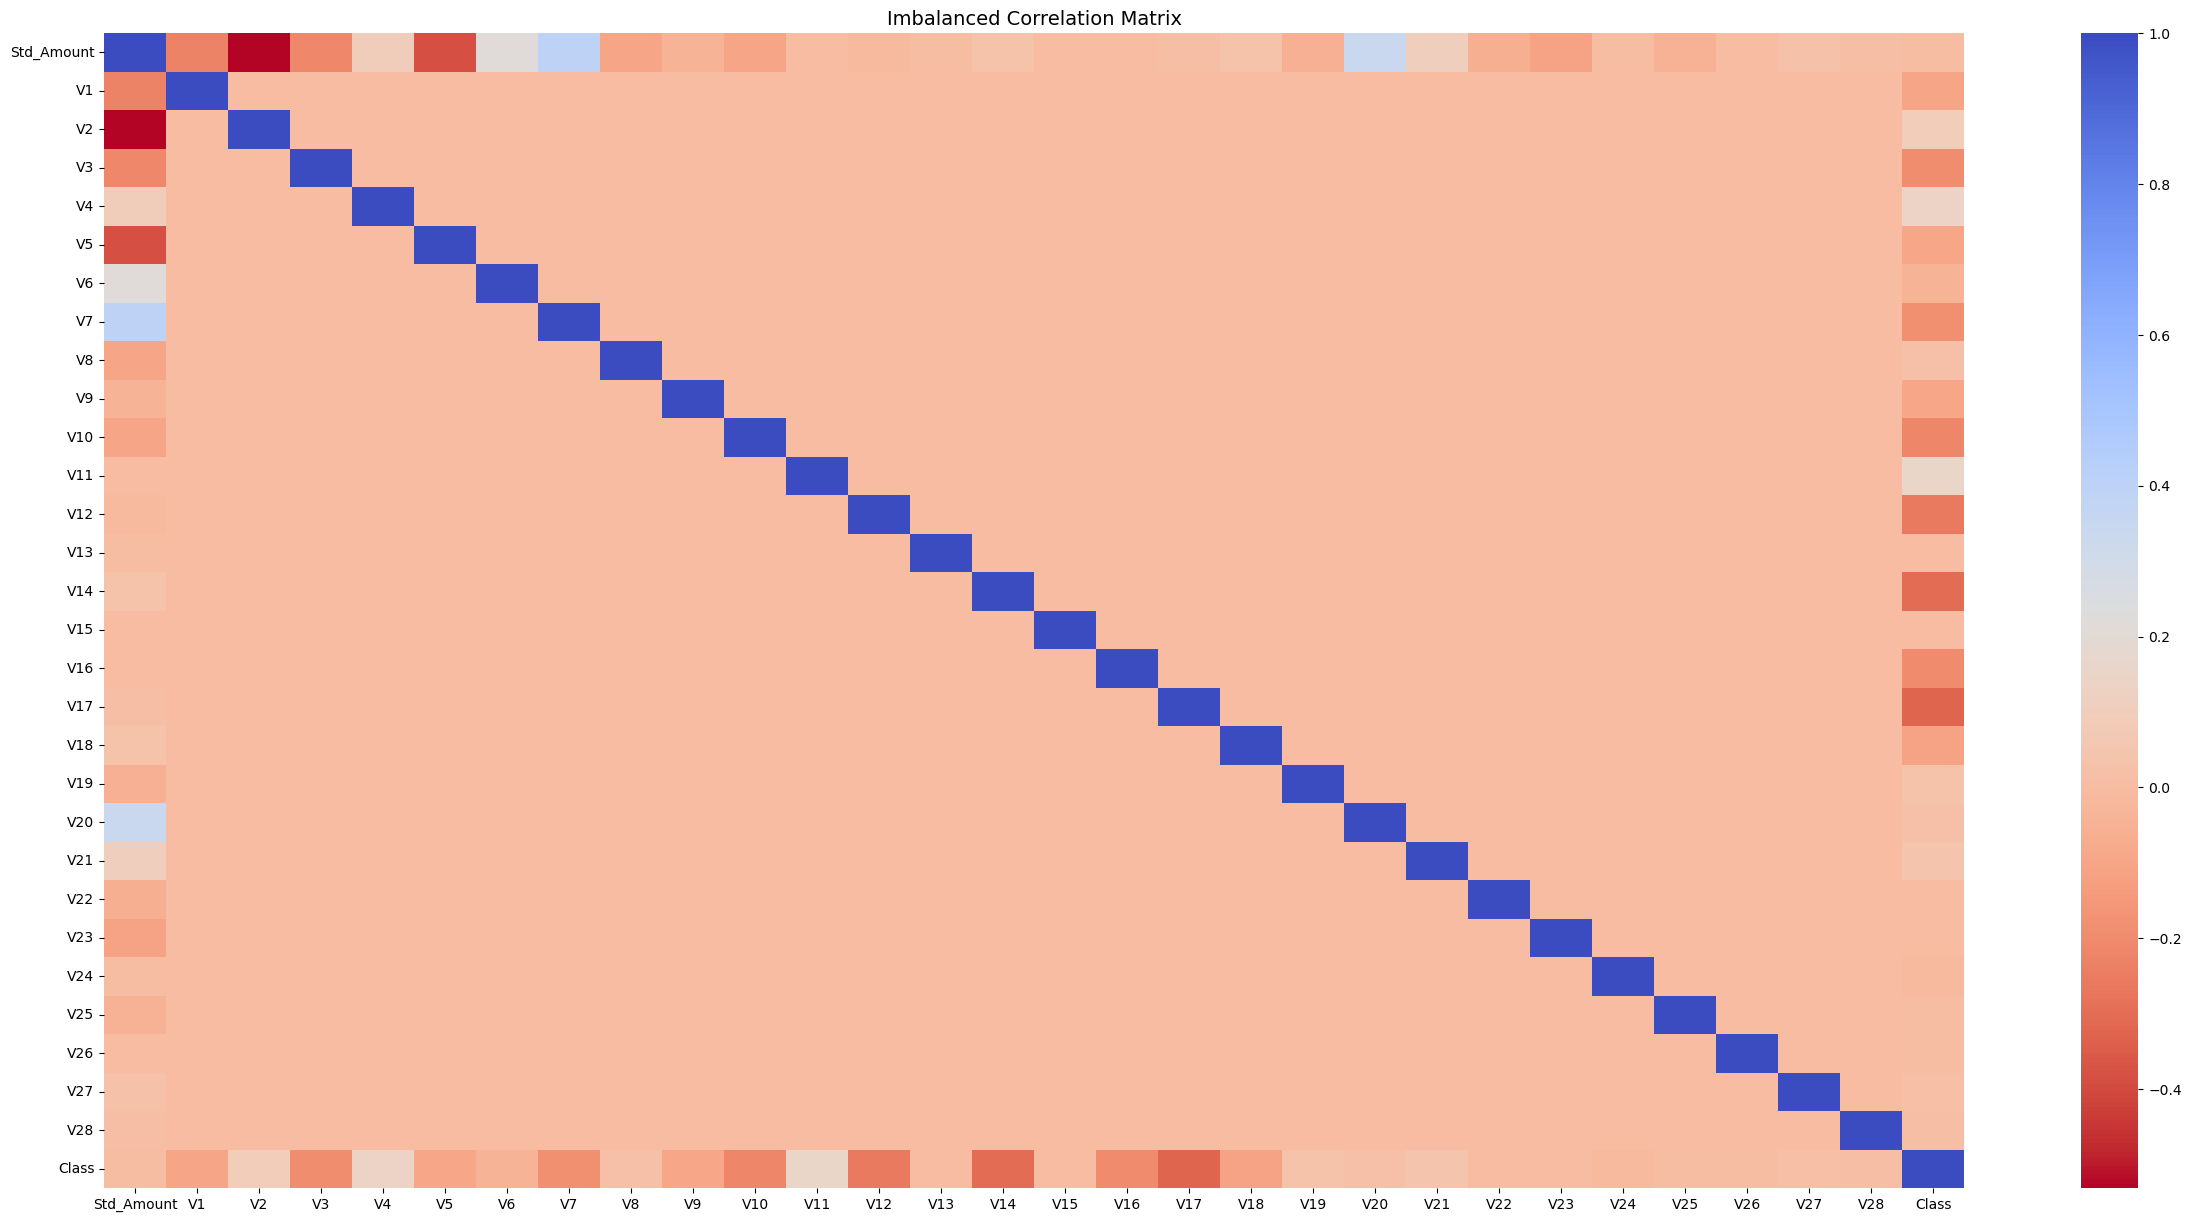

In [45]:
#checking correlation between features and the likelihood of the transaction to be fraud on the unbalanced dataset
f, ax1 = plt.subplots(figsize=(30,15))
corr = creditcard_data.corr()
sns.heatmap(corr, cmap='coolwarm_r' , annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)

Red (Positive Correlation): Features that increase together.
Blue (Negative Correlation): Features that decrease together.
As seen. the correlations cannot be properly visualised because of the imbalance in the dataset. This is because the correlation matrix is affected by the high imbalance between the classes. So, lets balance our classes and then visualise the correlation matrix again

In [47]:
#Checking the number of instances for each class in the train dataset
print(Ytrain_final.value_counts())

Class
0    170554
1       329
Name: count, dtype: int64


In [48]:
#Using ADASYN for oversampling
ada = ADASYN(sampling_strategy = 'minority', random_state=42)

#Oversampling is applied only on the training set
X_adasampled, Y_adasampled = ada.fit_resample(Xtrain_final, Ytrain_final)
print('Resample dataset shape %s' % Counter(Y_adasampled))
print('Shape of X_adasampled: {}'.format(X_adasampled.shape))
print('Shape of Y_adasampled: {}'.format(Y_adasampled.shape))

Resample dataset shape Counter({1: 170555, 0: 170554})
Shape of X_adasampled: (341109, 29)
Shape of Y_adasampled: (341109,)


In [49]:
#check the distribution of both the labels
train_label, train_count = np.unique(Y_adasampled, return_counts= True)
print('Label Distribbution: \n')
print(train_count/len(Y_adasampled))

Label Distribbution: 

[0.49999853 0.50000147]


In [50]:
print(type(X_adasampled))
print(type(Y_adasampled))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


X_adasampled and Y_adasample are the balanced trained set resulted after using oversampling These are ndarrays. In order to visualise a correlation matrix, they are converted to a dataframe and joined to form a single dataframe  in the below series of block

In [52]:
Xsm_train_df = pd.DataFrame(X_adasampled)
Xsm_train_df.columns = Xtrain.columns
Ysm_train_df = pd.DataFrame(Y_adasampled)
Ysm_train_df = Ysm_train_df.rename(columns={0: 'Class'})
print(Xsm_train_df.head())
print(Ysm_train_df.head())

   Std_Amount        V1        V2        V3        V4        V5        V6  \
0   -0.286173 -0.313555  0.586734  3.039981  2.848687 -0.158865  0.838171   
1    0.237546  1.883183 -0.640580  0.094691  0.386752 -0.859323  0.238667   
2    1.170265 -5.593796 -3.140554 -0.055757  1.539374  1.321195  1.449076   
3   -0.267729 -0.851124  0.819195  2.014788 -0.634556 -0.166583  0.779931   
4    1.369384 -1.339343  0.842304  2.210153  3.009876 -0.501056  1.506612   

         V7        V8        V9  ...       V19       V20       V21       V22  \
0 -0.305911  0.136755  1.081775  ...  0.211776  0.064667 -0.064730  0.538368   
1 -1.172713  0.238254  2.560352  ... -0.228614 -0.191241 -0.063316  0.025427   
2  0.494910 -0.187489  1.098618  ...  0.313058 -3.165442 -0.732926  1.617461   
3 -0.248282  0.440142  1.000038  ...  0.608179  0.309633  0.133497  0.615617   
4  0.044767  0.574622 -0.545759  ...  1.033634  0.245178 -0.188658 -0.159114   

        V23       V24       V25       V26       V27     

In [53]:
#Merging the Xsm_train_df and Ysm_train_df based on the index values to get a single dataframe in order to visualize a correlation matrix
new_df= pd.merge(Xsm_train_df, Ysm_train_df, how='inner', left_index=True, right_index=True)
new_df.head()

,Std_Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.286173,-0.313555,0.586734,3.039981,2.848687,-0.158865,0.838171,-0.305911,0.136755,1.081775,...,0.064667,-0.064730,0.538368,0.017643,0.514390,-0.970922,-0.131954,0.072962,-0.014056,0
1,0.237546,1.883183,-0.640580,0.094691,0.386752,-0.859323,0.238667,-1.172713,0.238254,2.560352,...,-0.191241,-0.063316,0.025427,0.346800,0.700140,-0.686270,0.387537,-0.060475,-0.044121,0
2,1.170265,-5.593796,-3.140554,-0.055757,1.539374,1.321195,1.449076,0.494910,-0.187489,1.098618,...,-3.165442,-0.732926,1.617461,1.182141,-1.534997,0.203254,-0.308358,-0.982457,-0.584698,0
3,-0.267729,-0.851124,0.819195,2.014788,-0.634556,-0.166583,0.779931,-0.248282,0.440142,1.000038,...,0.309633,0.133497,0.615617,-0.475375,0.010686,0.582486,-0.302416,0.486000,0.209563,0
4,1.369384,-1.339343,0.842304,2.210153,3.009876,-0.501056,1.506612,0.044767,0.574622,-0.545759,...,0.245178,-0.188658,-0.159114,-0.241138,-0.402550,0.057283,0.231537,0.067849,-0.249524,0


Text(0.5, 1.0, 'Balanced Correlation Matrix')

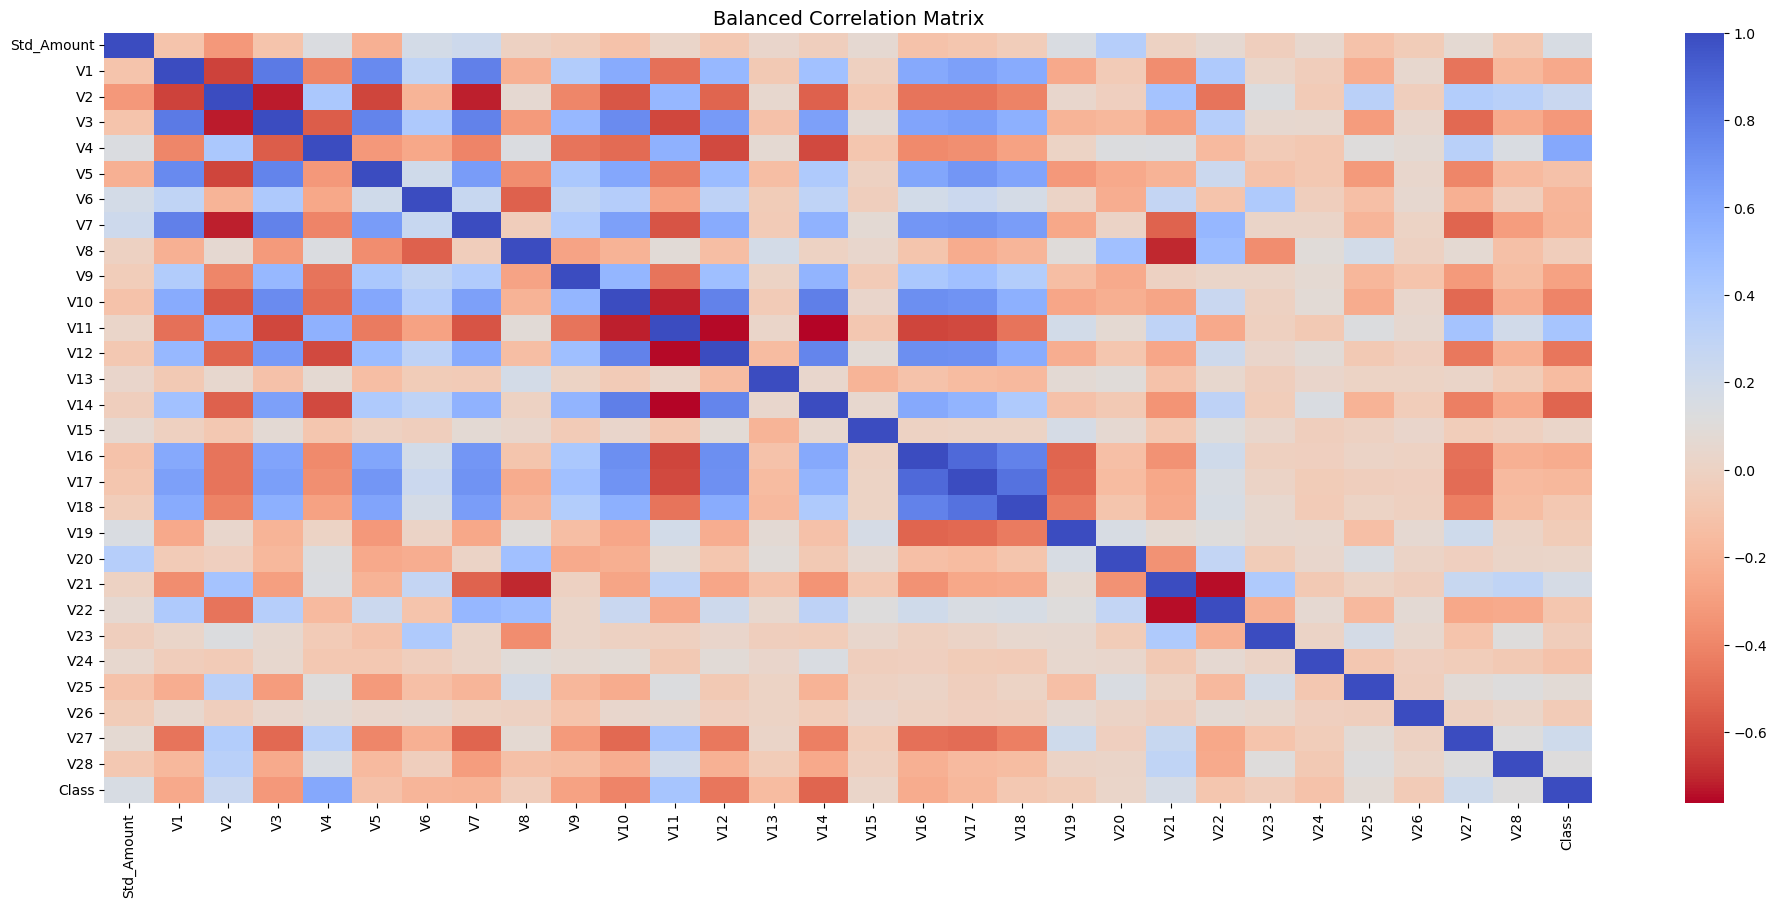

In [54]:
#checking correlation between features on the balanced dataset
f, ax1 = plt.subplots(figsize=(24,10))

corr = new_df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':30}, ax=ax1)
ax1.set_title("Balanced Correlation Matrix", fontsize=14)

Negative and Positive correlation can be seen in the matrix above
Features, V14, V12, V10 and V3 show negative correlation towards the 'Class', As, lower are these values, more likely the transaction is Fraud.
Features V4, V11, V2 and V19 show positive correlation. As, higher are these values, more likely the transaction is Fraud.

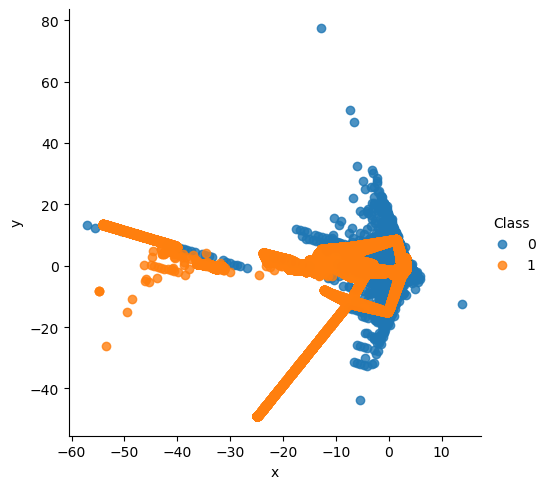

In [56]:
#visualising balanced train dataset
X_df = pd.DataFrame(X_adasampled)
Y_df = pd.DataFrame(Y_adasampled)
Y_df = Y_df.rename(columns={0: 'Class'})
train_2d= pd.DataFrame(pca.fit_transform(X_df.iloc[:,0:29]))
train_2d= pd.concat([train_2d, Y_df], axis=1)
train_2d.columns=['x','y','Class']
sns.lmplot(x='x', y='y', data= train_2d,fit_reg=False, hue='Class')


Apply PCA to reduce the feature set to 2 dimensions.
This process allows for visualizing how well the oversampling balanced the classes in the 2D PCA-transformed feature space.

The above plot gives a visual representation of the balanced dataset. As seen the data is not linearly separable. Hence, a Multi-Layer Perceptron is trained on this data, in order to predict the data as 'fraud' or 'geuine'. For the training of the Multi-layer perceptron, many parameters need to be turned, thus a grid search is used for this purpose. The Grid-Search is performed on the subset of the data, as it takes a lot of time to run. The following blocks creates a subset of the dataset using random undersampling used for this purpose only.

In [59]:
#An undersample dataset is created to tune the parameters using grid-search
Ytrain_df = pd.DataFrame(Ytrain_final)
Ytrain_df = Ytrain_df.rename(columns={0: 'Class'})
Train_set= pd.merge(Xtrain_final, Ytrain_df, how='inner', left_index=True, right_index=True)
Train_set.head()

,Std_Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
14162,-0.286173,-0.313555,0.586734,3.039981,2.848687,-0.158865,0.838171,-0.305911,0.136755,1.081775,...,0.064667,-0.064730,0.538368,0.017643,0.514390,-0.970922,-0.131954,0.072962,-0.014056,0
152802,0.237546,1.883183,-0.640580,0.094691,0.386752,-0.859323,0.238667,-1.172713,0.238254,2.560352,...,-0.191241,-0.063316,0.025427,0.346800,0.700140,-0.686270,0.387537,-0.060475,-0.044121,0
227171,1.170265,-5.593796,-3.140554,-0.055757,1.539374,1.321195,1.449076,0.494910,-0.187489,1.098618,...,-3.165442,-0.732926,1.617461,1.182141,-1.534997,0.203254,-0.308358,-0.982457,-0.584698,0
217316,-0.267729,-0.851124,0.819195,2.014788,-0.634556,-0.166583,0.779931,-0.248282,0.440142,1.000038,...,0.309633,0.133497,0.615617,-0.475375,0.010686,0.582486,-0.302416,0.486000,0.209563,0
80544,1.369384,-1.339343,0.842304,2.210153,3.009876,-0.501056,1.506612,0.044767,0.574622,-0.545759,...,0.245178,-0.188658,-0.159114,-0.241138,-0.402550,0.057283,0.231537,0.067849,-0.249524,0


In [60]:
Train_set.shape

(170883, 30)

In [61]:
#length of Frauds
length_frauds = len(Train_set[Train_set.Class==1])
length_frauds

329

In [62]:
#Taking only frauds in a dataframe
fraud_df = Train_set.loc[Train_set['Class'] == 1]
fraud_df.head()


,Std_Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
143188,-0.279466,-3.003459,2.096150,-0.487030,3.069453,-1.774329,0.251804,-4.328776,-2.425478,-0.985222,...,0.692537,0.163967,1.245648,-0.269241,0.537102,-0.220757,-0.059555,0.460710,-0.033551,1
86155,1.110878,-2.756007,0.683821,-1.390169,1.501887,-1.165614,-0.131207,-1.478741,-0.246922,-0.100523,...,-0.106945,0.320474,0.611027,0.174864,-0.502151,-0.174713,1.179242,-1.166315,0.821215,1
9487,-0.293440,-4.153014,8.204797,-15.031714,10.330100,-3.994426,-3.250013,-10.415698,4.620804,-5.711248,...,1.412625,1.976988,0.256510,0.485908,-1.198821,-0.526567,0.634874,1.627209,0.723235,1
163586,0.600852,0.949241,1.333519,-4.855402,1.835006,-1.053245,-2.562826,-2.286986,0.260906,-0.895366,...,0.424608,0.306598,-0.854627,0.101177,-0.281497,0.024444,-0.107944,0.625289,0.315677,1
223578,-0.183050,-5.256434,0.364541,-5.412085,2.400031,0.697301,-1.998755,-5.835532,-0.887739,-2.828287,...,-0.403685,-0.648259,0.511285,-1.110045,0.178987,0.220235,-0.699809,0.580487,-0.173630,1


In [63]:
#Taking only non-frauds in a dataframe
non_fraud_df = Train_set.loc[Train_set['Class'] == 0]
#Randomly select the same number as fraud
non_frauds = non_fraud_df.sample(n=length_frauds)
non_frauds.shape

(329, 30)

In [64]:
#Appending both non-frauds and frauds
undersampled_df = pd.concat([fraud_df, non_frauds], ignore_index=True)
#Randomly shuffling all the instances
undersampled_df = sklearn.utils.shuffle(undersampled_df)
undersampled_df.head()
undersampled_df.shape

(658, 30)

In [65]:
#Separating labels from the other features
X_undersample = undersampled_df.drop('Class', axis=1)
Y_undersample = undersampled_df['Class']
print(X_undersample.shape)
print(Y_undersample.shape)
X_undersample.head()

(658, 29)
(658,)


,Std_Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
169,-0.178719,1.917827,0.951967,-2.059206,3.833998,1.668192,0.769826,0.232463,0.107941,-1.143646,...,-1.150627,-0.115922,0.015255,0.239994,-0.111916,-0.380576,0.370995,0.189117,-0.005823,-0.012105
403,10.447565,-0.396212,-2.937570,0.270720,0.820805,-1.547783,1.172940,0.069491,0.318960,0.859984,...,-0.278145,1.380111,0.329985,-0.515829,-0.536006,-0.192652,-0.335947,0.873248,-0.149465,0.129568
636,0.051422,-0.459376,0.923432,1.291135,0.582846,0.444870,0.518190,0.700629,0.156795,-0.510912,...,0.184474,-0.108614,0.018783,0.200895,-0.250094,-0.281879,0.245780,-0.363818,-0.061128,0.000107
266,0.752603,-3.821939,5.667247,-9.244963,8.246147,-4.368286,-3.450735,-8.427378,2.305609,-5.338079,...,0.156015,1.115247,1.990520,0.083353,-0.062264,0.390188,0.329884,0.098017,1.869570,1.000850
370,0.286453,-0.035480,0.078329,1.502771,0.554434,-0.228416,-0.380160,0.574162,-0.477213,-1.158099,...,-0.517878,-0.383085,-0.417887,-0.404119,0.314524,0.292695,-1.328655,-0.646536,-0.166030,-0.200858


In [66]:
#Converting undersample train sets in numpy arrays
X_us_arr = X_undersample.values
Y_us_arr = Y_undersample.values


In [67]:
#Converting test and validation set into numpy arrays
Xval_arr = Xval.values
Yval_arr = Yval.values
Xtest_arr = Xtest.values
Ytest_arr = Ytest.values

In [68]:
pip install tensorflow scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [69]:
import tensorflow as tf
print(tf.__version__)


2.16.2


In [ ]:
# Define the model-building function
def create_model(optimizer='adam', init_mode='uniform', learn_rate=0.01, dropout_rate=0.0, neurons=1):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_us_arr.shape[1], kernel_initializer=init_mode, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
    optimizer_instance = Adam(learning_rate=learn_rate) if optimizer == 'adam' else optimizer
    model.compile(loss='binary_crossentropy', optimizer=optimizer_instance, metrics=['accuracy'])
    return model

# Wrap the model using KerasClassifier
model_tuning = KerasClassifier(build_fn=create_model, verbose=0,dropout_rate=0.0,init_mode='uniform',neurons=1)
# Define the parameter grid
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'init_mode': ['uniform', 'lecun_uniform'],
   # 'learn_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.0, 0.1, 0.2],
    'neurons': [1, 5, 10],
    'epochs': [50, 100],
    'batch_size': [10, 20]
}

# Create the GridSearchCV object
grid = GridSearchCV(estimator=model_tuning, param_grid=param_grid, scoring='f1', cv=5, n_jobs=-1)

# Fit the model
grid_result = grid.fit(X_us_arr, Y_us_arr)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
# #Grid Search for hyperparameter tuning
# def create_model(neuron_1=29, dropout_rate=0.0, init_mode='uniform', learn_rate=0.01):
#     n_inputs = X_undersample.shape[1]
#     model = Sequential()
#     model.add(Dense(neuron_1, input_shape=(n_inputs, ), kernel_initializer=init_mode, activation= 'relu'))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
#     model.compile(Adam(lr=learn_rate), loss='binary_crossentropy')
#     return model
# #Keras models can be used with scikit learn by wrapping them with KerasClassifier
# model_tuning = KerasClassifier(build_fn=create_model,epochs=30, batch_size=700, verbose=1)

# neuron_1= [29, 30, 35, 40, 45, 50,55,60,65,70]
# learn_rate= [0.001, 0.01, 0.1, 0.2, 0.3]
# dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
# param_grid = dict(neuron_1=neuron_1, dropout_rate=dropout_rate, init_mode=init_mode, learn_rate=learn_rate)
# grid = GridSearchCV(estimator=model_tuning, param_grid=param_grid, scoring=make_scorer(f1_score), cv=5, n_jobs=-1)
# grid_result = grid.fit(X_us_arr, Y_us_arr)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# mean_score = grid_result.cv_results_['mean_test_score']
# std_score = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(mean_score, std_score, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [231]:
# Keras models can be used with scikit learn by wrapping them with Kerasclassifiers
model_tuning = KerasClassifier(build_fn=create_model,epochs=30, batch_size=700, verbose=1)

neuron_1=[29,30,35,40,45,50,55,60,65,70]
learn_rate=[0.001,0.01,0.1,0.2,0.3]
dropout_rate = [0.0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(neuron_1=neuron_1, dropout_rate=dropout_rate, init_mode=init_mode, learn_rate=learn_rate)
grid = GridSearchCV(estimator=model_tuning, param_grid=param_grid, scoring=make_scorer(f1_score), cv=5, n_jobs=1)
grid_result = grid.fit(X_us_arr, Y_us_arr)
#Summarize Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
mean_score = grid_result.cv_results_['mean_test_score']
std_score = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, params in zip(mean_score, std_score,params):
    print("%f (%f) with %r" % (mean,stdev,param))

ValueError: Invalid parameter dropout_rate for estimator KerasClassifier.
This issue can likely be resolved by setting this parameter in the KerasClassifier constructor:
`KerasClassifier(dropout_rate=0.0)`
Check the list of available parameters with `estimator.get_params().keys()`